In [144]:
import cv2
import numpy as np
import time
from skimage.io import imshow,imread,imsave
from scipy import ndimage as ndi
from skimage import feature
from matplotlib import pyplot as plt
from skimage.morphology import square,dilation


In [145]:
def region_of_interest(img, vertices):   
    mask = np.zeros_like(img)
    match_mask_color = (255,)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


In [160]:
image = imread('./dataset/original/493.jpg')

frame = cv2.resize(image,(300, 200))
height=frame.shape[0]
width=frame.shape[1]
region_of_interest_vertices = [   
    (0, height),
    (0, (height/3)),
    (width, (height/3)),
    (width, height)]

gray=cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray,100,200)
edges = dilation(edges, square(3))
edges[:,297:300] = 0 
edges = ndi.gaussian_filter(edges,2)

crop = region_of_interest(edges,np.array([region_of_interest_vertices], np.int32))

lowerR=np.array([220,70,70])
upperR=np.array([255,160,170])    
maskR = cv2.inRange(frame, lowerR, upperR)

countR=0
for i in range(width):
    if maskR[170][i] == 255:        
        countR+=1
    if countR > 10:
        print('stop')
        break
print(maskR[170])

stop
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 2

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


width: 300 , height: 200


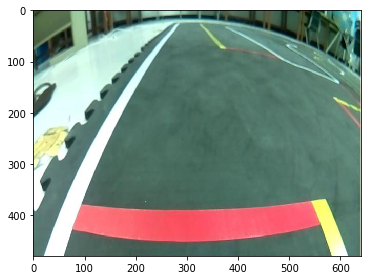

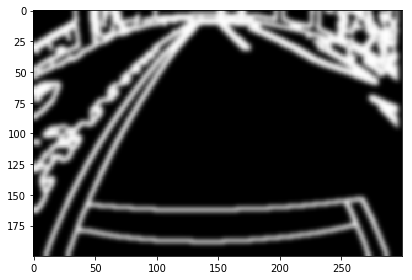

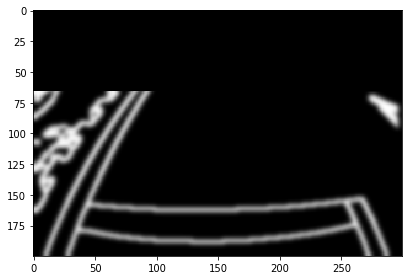

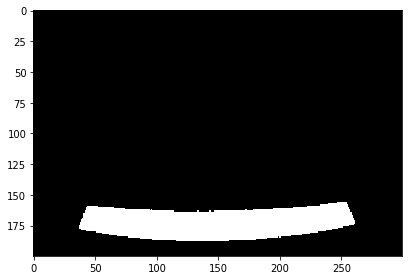

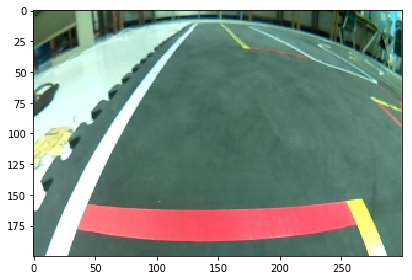

In [152]:
# Show result
show=[]
show.append(image)
show.append(edges)
show.append(crop)
show.append(maskR)
show.append(frame)
# imshow_collection(show)

for f in show:
    plt.figure()
    imshow(f)
print('width:',width,', height:',height)